<a href="https://colab.research.google.com/github/luizrenault/tp547/blob/main/trabalho_sinal_4pam/mod_demod_4PAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

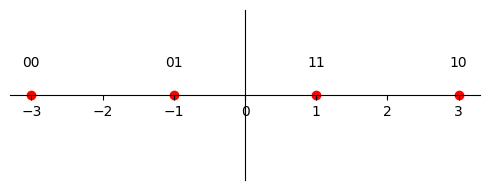

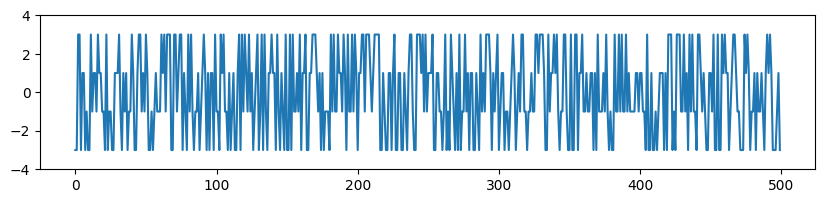

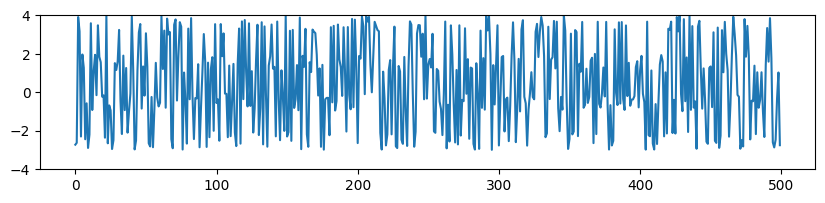

[0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1
 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1
 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 0
 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1
 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1
 1 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0
 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 1 1 1
 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1
 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1
 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1
 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1
 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0
 1 1 1 1 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 1 0
 0 0 0 1 0 1 0 1 0 1 1 1 

In [ ]:
from ctypes import alignment
import numpy as np
import matplotlib.pyplot as plt
from sympy.combinatorics.graycode import GrayCode
import math

def gray_seq(m):
    ret = np.array([],dtype=np.int8)
    for i in range(0, 1<<m):
        gray=i^(i>>1)
        ret = np.append(ret, gray)
    return ret

def de_gray_seq(m):
    ret = np.zeros(2**m,dtype=np.int8)
    for i in range(0, 1<<m):
        gray=i^(i>>1)
        ret[gray] = i
    return ret

def bitfield(n):
    return [int(digit) for digit in f"{'{0:02b}'.format(n)}"]# bin(n)[2:]] # [2:] to chop off the "0b" part


nr_bits = 1000
bits_por_simbolo = 2
amostras_por_simbolo = 1
sigma2 = 1 #variancia do ruído

mapa_simbolos = 2*(np.arange(0, 2**bits_por_simbolo) - 2**(bits_por_simbolo-1) + 0.5)
simbolos_indices = gray_seq(bits_por_simbolo)

#geração da sequência aleatória de bits
bits = (np.random.rand(nr_bits)>0.5) * 1

#modulador
dibits = bits.reshape(-1, bits_por_simbolo)
dibits_int = np.sum(dibits * np.arange(bits_por_simbolo, 0, -1),1)

simbolos = mapa_simbolos[simbolos_indices[dibits_int]]
simbolos_seq = np.repeat(simbolos, amostras_por_simbolo)

#gráfico do mapa de símbolos
fig = plt.figure(figsize = np.array([5,2]))
ax1 = plt.subplot(1,1,1)
ax1.spines['bottom'].set_position('zero')
ax1.spines['left'].set_position('zero')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.ylim([-1.5, 1.5])
plt.yticks([],[])
plt.scatter(mapa_simbolos,np.zeros(mapa_simbolos.shape), color="red")
for k in range(mapa_simbolos.shape[0]):
    plt.text(mapa_simbolos[k], 0.5, f"{'{0:02b}'.format(simbolos_indices[k])}", horizontalalignment = 'center' )
plt.tight_layout()
plt.title='Mapa de Símbolos'
plt.show()

#gráfico dos simbolos por amostras
fig = plt.figure(figsize = [10,2])
plt.plot(np.arange(0, nr_bits / bits_por_simbolo * amostras_por_simbolo), simbolos_seq)
plt.title='PAM'
plt.ylim([min(mapa_simbolos)-1, max(mapa_simbolos)+1])
plt.show()

#adicionando ruído
simbolos_seq_ruido = simbolos_seq + np.random.rand(simbolos_seq.shape[0]) * np.sqrt(sigma2)

#gráfico dos símbolos por amostras com ruido
fig = plt.figure(figsize = [10,2])
plt.plot(np.arange(0, nr_bits / bits_por_simbolo * amostras_por_simbolo), simbolos_seq_ruido)
plt.title='PAM'
plt.ylim([min(mapa_simbolos)-1, max(mapa_simbolos)+1])
plt.show()

#demodulador

#vetor com níveis para o decisor
decisor = (np.append(-np.inf, mapa_simbolos) + np.append(mapa_simbolos, np.inf))/2

#decisão em função dos níveis
decisao = np.zeros(simbolos_seq_ruido.shape, dtype=np.int8)
for i in np.arange(0,mapa_simbolos.shape[0]):
    decisao = decisao + np.bitwise_and(simbolos_seq_ruido >= decisor[i] , simbolos_seq_ruido < decisor[i+1]) * i

#demapeamento gray
demapeador = de_gray_seq(bits_por_simbolo)
demapeado = demapeador[decisao]

#sequência dos bits demodulados
demodulado = np.array([], dtype=np.int8)
for a in demapeado:
    demodulado = np.append(demodulado, bitfield(a))

print(bits)
print(demodulado)

print("Erros: ", np.sum(bits!=demodulado))
